In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline

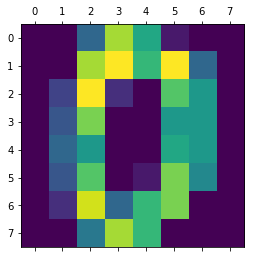

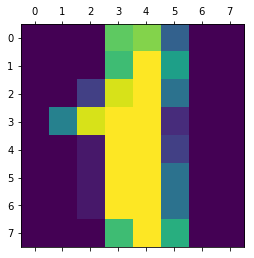

In [3]:
digits = load_digits()
for image in digits.images[:2]:
    plt.matshow(image)



In [4]:
df = pd.DataFrame(digits.data)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [5]:
df['target'] = digits.target
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [6]:
X = df.drop('target', axis='columns')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9555555555555556

In [7]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

[Text(69.0, 0.5, 'Truth'), Text(0.5, 42.0, 'Predicted')]

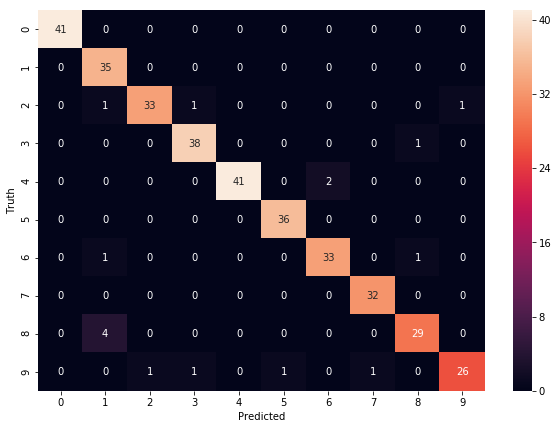

In [8]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, annot=True)
ax.set(xlabel='Predicted', ylabel='Truth')

In [9]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.85      1.00      0.92        35
           2       0.97      0.92      0.94        36
           3       0.95      0.97      0.96        39
           4       1.00      0.95      0.98        43
           5       0.97      1.00      0.99        36
           6       0.94      0.94      0.94        35
           7       0.97      1.00      0.98        32
           8       0.94      0.88      0.91        33
           9       0.96      0.87      0.91        30

    accuracy                           0.96       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.96      0.96       360

